# Titanic - Machine Learning from Disaster

In [ ]:
#Author
__author__ = "Bennett Heung"
__email__ = "bennett.heung@gmail.com"
__website__ = "https://github.com/Bennett-Heung"

Many passengers did not survive the unfortunate sinking of the Titanic. The data and information of these passengers on at https://www.kaggle.com/c/titanic/overview. The following table indicates the variables in the provided data.  

## Objective

| Variable | Definition | Key |
| ----------- | ----------- | ----------- |
| PassengerId | Unique identifiers for the passengers |
| survival | Survival | 0 = No, 1 = Yes|
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd|
| sex | Sex | |
| Age | Age in years| |
| sibsp | # of siblings / spouses aboard the Titanic|
|parch|	# of parents / children aboard the Titanic|
|ticket| Ticket number| |
|fare| Passenger fare| |
|cabin|	Cabin number| |
|embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton|

**The objective is to predict which passengers were more likely to survive based on the information given in the train and test datasets.** 

Predictions were in submissions and an accuracy score is also received. 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.utils import shuffle

%matplotlib inline

#conda install -c conda-forge tabulate

In [2]:
#Load data
def load_file(df): 
    """
    Reads csv file as a Pandas dataframe.
    
    Parameters
    ----------
    df: name of csv file 
    
    Returns 
    -------
    Dataframe of csv file
    
    ---
    """
    return pd.read_csv(df)

In [3]:
#Missing data
def n_missing(df):
    """
    Number of missing data in Pandas dataframe, df.
    
    Parameters
    ----------
    df: name of dataframe
    
    Returns
    -------
    Number of rows with missing data
    
    ---
    """
    return print(df.isnull().sum())

In [ ]:
#Check for duplicates
def n_duplicates(df):
    """
    Number of duplicates in Pandas dataframe, df.
    
    Parameters
    ----------
    df: name of dataframe
    
    Returns
    -------
    Number of duplicate rows in dataframe, df
    
    ---
    """
    return print(df.duplicated().sum())

In [4]:
#Quick scan of selected dataframe
def quick_scan(df):
    """
    Prints the shape, data types, head and tail of a Pandas dataframe.
    
    Parameters
    ----------
    df: name of dataframe
    
    Returns
    -------
    Prints the shape, data types, head and tail of a Pandas dataframe.
    
    ---
    """
    print('Shape:')
    display(df.shape)
    print('Data Types:')
    display(df.dtypes)
    print('Head:')
    display(df.head())
    print('Tail:')
    display(df.tail())

In [5]:
#Descriptive statistics
def descriptive_stats(df):
    """
    Prints the descriptive stats summaries for each data type.
    
    Parameters
    ----------
    df: name of dataframe
    
    Returns
    -------
    Prints the descriptive stats summaries for 'object', 'int64' and 'float64' data types in that order.
    
    ---
    """
    for data_type in 'object','int64', 'float64': 
        display(df.describe(include=data_type))

In [6]:
#Bar charts for categorical variables
def bar_charts(col, df):
    """
    Plots bar chart for a variable.
    
    Parameters
    ----------
    col: selected variable name in dataframe, df
    
    df: name of dataframe containing selected variable
    
    Returns
    -------
    Prints bar chart of each unique value's count. 
    
    ---
    """
    
    plt.title(col)
    df[col].value_counts().sort_index().plot(kind = 'bar')
    plt.savefig('Value_counts_'+col)
    plt.show()

In [7]:
#Visualisations for numeric features
def numeric_feature_plots(col, df):
    """
    Plots a distplot and a andboxplot for a variable.
    
    Parameters
    ----------
    col: selected variable name in dataframe, df
    
    df: name of dataframe containing selected variable
    
    Returns
    -------
    Plots a distplot and a boxplot for the selected variable 'col'.
    
    ---
    """
    
    fig = plt.figure()
    plt.figure(figsize=(10, 5))
    
    #1. Distplot
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    
    #2. Boxplot
    plt.subplot(1,2,2)   
    sns.boxplot(df[col])
        
    plt.tight_layout()
    plt.savefig('numeric_feature_plots'+str(col)+'.png')
    plt.show()

In [8]:
#Visualisations for categorical features 
def categorical_feature_plots(col, target_col, df):
    """
    Plots a line chart, boxplot and violin plot for a variable.
    
    Parameters
    ----------
    col: selected variable name in dataframe, df
    
    df: name of dataframe containing selected variable
    
    Returns
    -------
    Plots a line chart, boxplot and violin plot for the selected variable 'col'.
    
    ---
    """
    
    fig = plt.figure()
    plt.figure(figsize=(10, 5))

    #Line chart: target vs. variable
    plt.subplot(1,3,1)
    y_mean = df.groupby([col]).mean()
    y_mean = y_mean[target_col]
    y_std = df.groupby([col]).std()
    y_std = y_std[target_col]
    x = y_mean.index
    
    plt.plot(x, y_mean, '-b')
    plt.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.2)
    plt.xlabel(col)
    plt.ylabel(target_col)

    #Boxplot
    plt.subplot(1,3,2)
    sns.boxplot(df[col], df[target_col])
    
    #Voilinplot
    plt.subplot(1,3,3)
    sns.violinplot(df[col], df[target_col])
    
    plt.tight_layout()
    plt.savefig('categorical_feature_plots'+str(col)+'.png')
    plt.show()

In [9]:
#Evaluation Metrics (scores) 
def train_eval_model(model, feature_df, target_df):
    """
    Collects model(s) accuracy scores.
    
    Parameters
    ----------
    model: model being evaluated
        Can be single model or multiple models - in [model 1, model 2,...]
    
    feature_df: name of dataframe containing feature variables for the model
    
    target_df: name of dataframe containing the target variable for the model
    
    Returns
    -------
    Can run 'accuracy' containing accuracy scores of a selected model(s).
    
    ---
    """
    
    accuracy_scores = cross_val_score(model, feature_df, target_df, cv=5, scoring='accuracy')
    accuracy[model] = np.mean(accuracy_scores)

In [10]:
#Find best model from each model type using GridSearchCV
def best_model(model, parameters, feature_df,target_df): 
    """
    Tests and tunes hyperparameters to find the best model (estimator).
    
    Parameters
    ----------
    model: model being tested
        Can be single model or multiple models - in [model 1, model 2,...]
    
    parameters: dictionary of hyperparameters to tune

    feature_df: name of dataframe containing feature variables for the model
    
    target_df: name of dataframe containing the target variable for the model
    
    Returns
    -------
    Best_model: contains information on model type of the best model 
    Best_model_params: contains information on hyperparameters of the best model 
    Best_model_score: contains the Accuracy score of the best model 
    
    ---
    """
    
    #GridSearchCV
    model_Grid = GridSearchCV(model, parameters, cv=5, scoring = 'accuracy') 
    model_Grid.fit(feature_df,target_df)
    
    #Best model
    Best_model[model] = model_Grid.best_estimator_
    Best_model_params[model] = model_Grid.best_params_
    Best_model_score[model] = model_Grid.best_score_

## Loading Data

Load the provided train and test datasets.

In [11]:
#Load data and define dataframes
train_data = load_file("train.csv")
test_data = load_file("test.csv")

## Cleaning Data

Cleaning data involves finding and resolving missing data, duplicates, invalid data and irrelevant data. 

Proxies replaced missing data in the **'Age'**, **'Embarked'** and **'Fare'** variables across both loaded files. 
- For **'Age'**, the missing data was proxied as the median age of individuals with matching *'Pclass'*,*'SibSp'* and *'Parch'*.
- Missing **'Embarked'** data was proxied with the mode and missing **'Fare'** data was proxied with the median value. 

No duplicates were found. 

Only invalid 'Fare' data was suspected. Outliers of 'Fare' values of more than 300 were removed, while 'Fare' values of 0 were left unchanged due to uncertainty behind reasoning of them in the dataset for such numerous individuals. 

'SibSp' and 'Parch' variables were also set up in the process to provide proxies for missing 'Age' data and for One Hot Encoding for the next sections. 

In [12]:
quick_scan(train_data)

Shape:


(891, 12)

Data Types:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Head:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Tail:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
quick_scan(test_data)

Shape:


(418, 11)

Data Types:


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Head:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Tail:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Both datasets have matching variables with the same data types; only test_data is missing 'survived', as it is our target variable. 

In [14]:
descriptive_stats(train_data)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",male,347082,B96 B98,S
freq,1,577,7,4,644


,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [15]:
descriptive_stats(test_data)

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Sweet, Mr. George Frederick",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


,PassengerId,Pclass,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.447368,0.392344
std,120.810458,0.841838,0.896760,0.981429
min,892.000000,1.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,0.000000
50%,1100.500000,3.000000,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,0.000000
max,1309.000000,3.000000,8.000000,9.000000


,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


In [16]:
n_duplicates(train_data)

0


In [17]:
n_duplicates(test_data)

0


In [18]:
n_missing(train_data)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
n_missing(test_data)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Findings (actions are numbered):**
- train_data and test_data have 816 and 418 individuals.
- No duplicates were found.

- Both PassengerId and Name are both unique identifiers: 
    1. Both confirm that each individual is unique; **drop them as they would not be relevant for further analysis**. 

- Sex is male and female only
    2. **Convert male = 0 and female = 1 after analysis, for modelling purposes**

- Not all passengers show tickets and there are not many unqiue tickets
    3. **Drop Ticket** - ticket information would not be relevant for further analysis

- *Age* and *Cabin* appear have the most missing data in both datasets: 
    4. **Consider proxies for missing age data**
    5. **Remove Cabin** - large majority of observations had missing data.

- In train_data, *Embarked* had two missing values:
    6. **Proxy missing values in train_data with the mode, 'S' (only two missing and most likely to be 'S').**

- In test_data, *Fare* had one missing value and potential invalid data and suspected outliers:
    7. **Proxy for missing value for median - median preferred over mean due to potential outliers**
    8. The smallest fare is 0, which is a free fare, and largest fare is 512, which is a significantly larger descriptive statistic than the rest - **need to explore further**.

**Next Steps:** 
- Drop irrelevant variables: 'Name','Ticket','Cabin','PassengerId'
- Find proxies for missing data in: 'Age', 'Embarked', 'Fare'
- Convert male = 0 and female = 1 after analysis, conversion only for modelling purposes

### Dropping irrelevant variables

'PassengerId','Name','Ticket' and 'Cabin' were irrelevant variables that were dropped.

In [20]:
#Drop variables in train_data
train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [21]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
#Drop irrelevant variables in test_data
test_data.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [23]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Proxies

Process of determining and applying proxies for missing data in the 'Embarked', 'Fare' and 'Age' variables. 

In [24]:
#Replace null Embarked with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [25]:
train_data['Embarked'].isnull().sum()

0

In [26]:
#Replace null Fare with median
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [27]:
test_data['Fare'].isnull().sum()

0

In [28]:
categorical_cols = train_data.select_dtypes(include = ['int64','object']).columns
numerical_cols = train_data.select_dtypes('float64').columns

In [29]:
categorical_cols

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [30]:
numerical_cols

Index(['Age', 'Fare'], dtype='object')

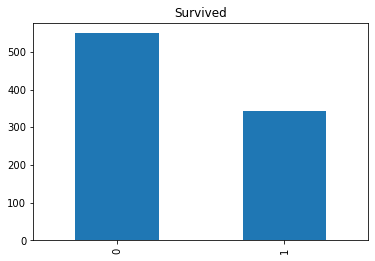

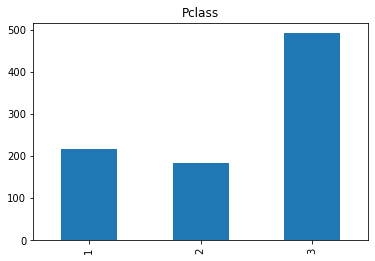

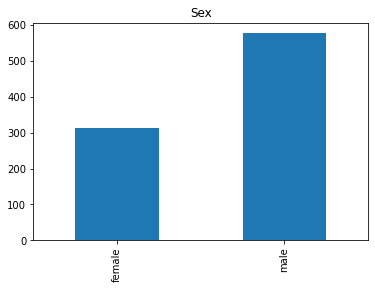

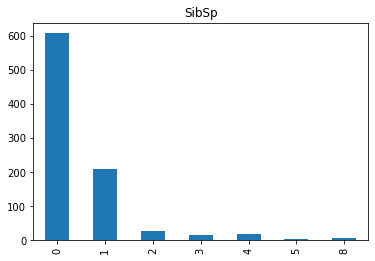

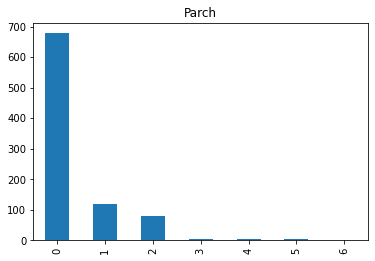

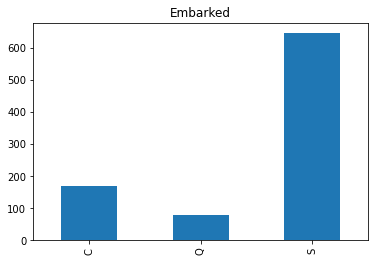

In [31]:
for col in categorical_cols: 
    bar_charts(col, train_data)

**Findings (actions are numbered)**: 
- More individuals did not survive 
- Most passengers were in the third ticket class (Pclass = 3) 
- More males than females
- Most passengers had 0 or 1 siblings/spouses (SibSp) aboard; not many passengers with more than 4 siblings/spouses (SibSp) 
    1. **Create a 'more than 4' group for SibSp - simplify next steps and still make up only a small number of passengers. (below)**
- Most passengers have between 0 and 2 (inclusive) parents / children aboard (Parch)
    2. **Create a 'more than 2' group for Parch - simplify next steps and still make up only a small number of passengers. (below)**
- Majoirity of passengers boarded from Southampton. 

In [32]:
#Create a 'more than 4' group for SibSp
train_data.loc[train_data['SibSp'] > 4, 'SibSp'] = '4+'

In [33]:
#Convert integer into string 
train_data['SibSp'] = train_data['SibSp'].astype(str)

In [34]:
#Create a 'more than 2' group for Parch
train_data.loc[train_data['Parch'] > 2, 'Parch'] = '2+'

In [35]:
#Convert integer into string 
train_data['Parch'] = train_data['Parch'].astype(str)

<Figure size 432x288 with 0 Axes>

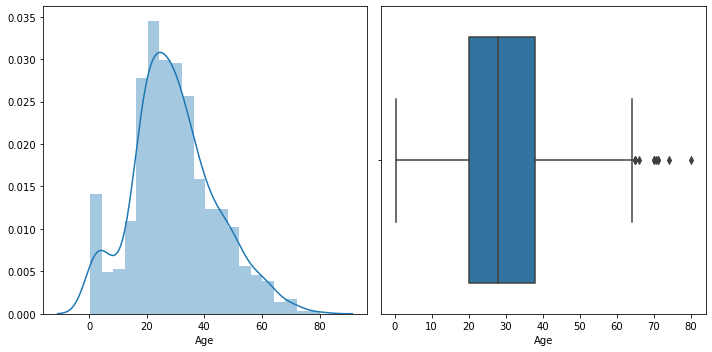

<Figure size 432x288 with 0 Axes>

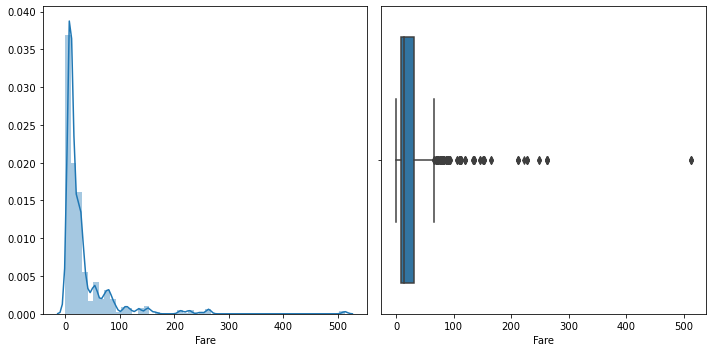

In [36]:
#Distplots and Boxplots for numerical variables
for col in numerical_cols:
    numeric_feature_plots(col,train_data)

In [37]:
#Check Fares = 0
train_data.loc[train_data['Fare']==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,male,36.0,0,0,0.0,S
263,0,1,male,40.0,0,0,0.0,S
271,1,3,male,25.0,0,0,0.0,S
277,0,2,male,NaN,0,0,0.0,S
302,0,3,male,19.0,0,0,0.0,S
413,0,2,male,NaN,0,0,0.0,S
466,0,2,male,NaN,0,0,0.0,S
481,0,2,male,NaN,0,0,0.0,S
597,0,3,male,49.0,0,0,0.0,S
633,0,1,male,NaN,0,0,0.0,S


Findings (actions are numbered): 
- Distribution of age is slightly skewed to the right, but it appears reasonable; keep suspected outliers as they appear not unreasonable. 
- Its possible of exceptionally high-end fare prices, however fare prices over 300 do appear too farfetched to consider as reasonable:
    1. **Drop fare prices over 300 - treated as outliers**
- Not many obvious reasons why Fares could be zero for these numerous individuals; only that they were all Males embarking from Southampton. *These values in the dataset were not treated further due to reasonable doubt behind reasoning of zero values.*

In [38]:
#Drop fare prices over 300 - dropping Fare outliers
train_data = train_data[train_data['Fare'] <300]
#Check shape
train_data.shape

(888, 8)

In [39]:
#Create notnull_age for rows without missing age data
notnull_age = train_data[train_data["Age"].notnull()]
#Check shape
notnull_age.shape

(711, 8)

<Figure size 432x288 with 0 Axes>

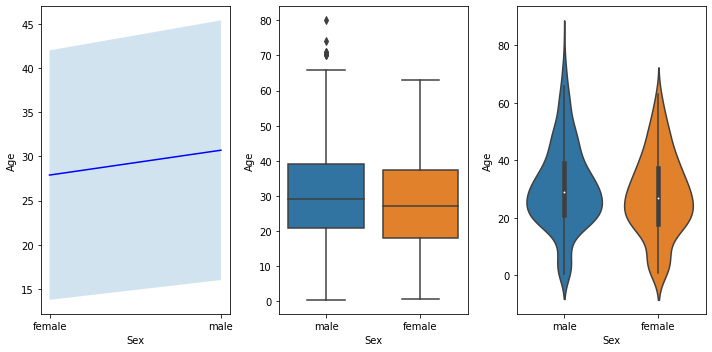

<Figure size 432x288 with 0 Axes>

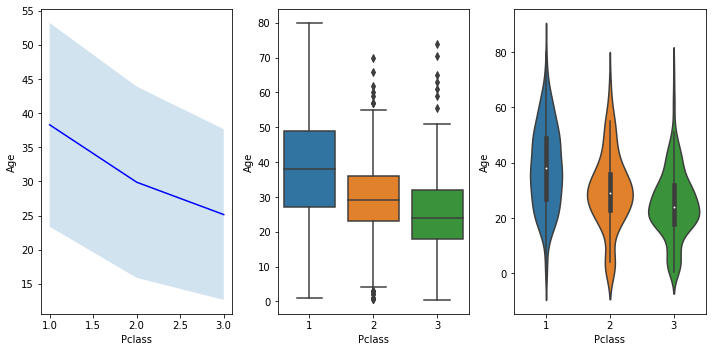

<Figure size 432x288 with 0 Axes>

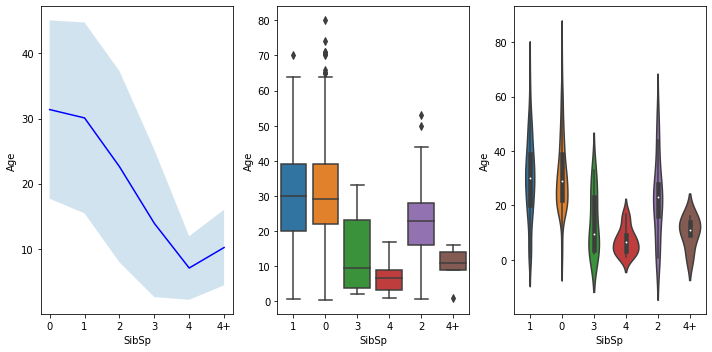

<Figure size 432x288 with 0 Axes>

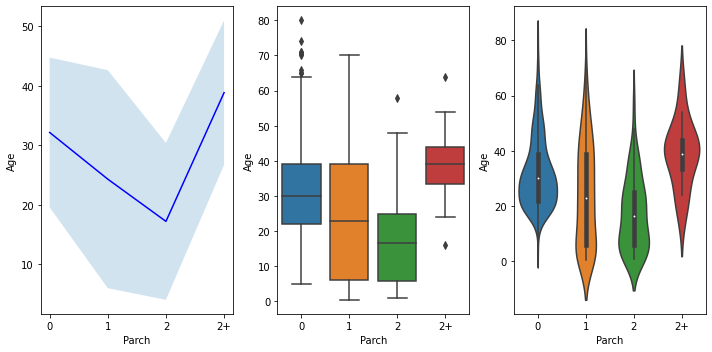

<Figure size 432x288 with 0 Axes>

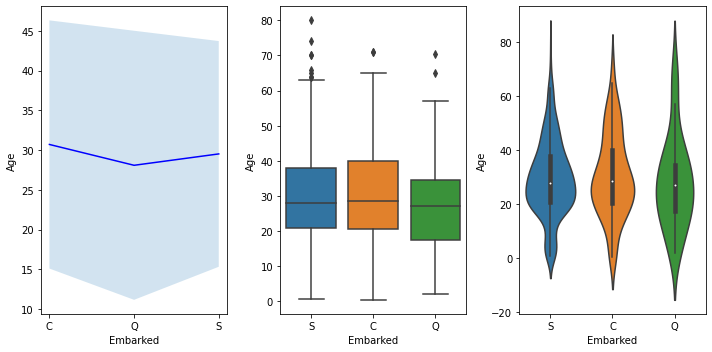

<Figure size 432x288 with 0 Axes>

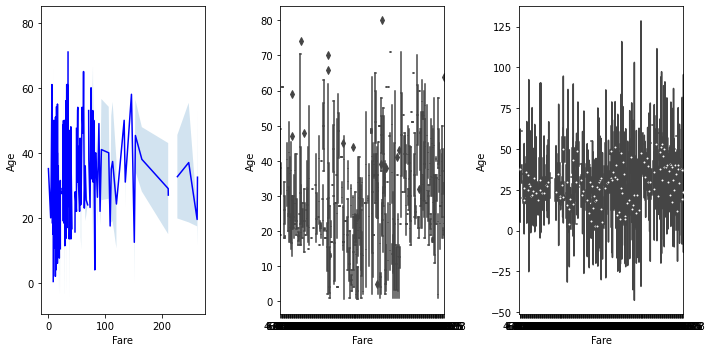

In [40]:
#Check if variables that could be considered to proxy missing age data
for col in ['Sex','Pclass','SibSp','Parch','Embarked','Fare']:
    categorical_feature_plots(col, 'Age', train_data)

Findings: 
- Proxy for missing *Age* data could involve considering **Pclass**, **SibSp** and **Parch**, as they show clear differences in age as per category. 
- No stark differences in age distributions for *Sex* and *Embarked* categories to be considered as factors for the age proxy.
- It is no clear indication of age across the Fare values, so it is not considered for the missing *Age* proxy.

In [41]:
#Proxy for missing Age data: median values according to an individual's Pclass, SibSp and Parch
#Median was used due to wide age distributions across each variables' categories
train_data['Age'] = train_data.groupby(['Pclass','SibSp','Parch'])['Age'].transform(lambda x: x.fillna(x.median()))

In [42]:
#Check if there are any more nulls after proxy
train_data['Age'].isnull().sum()

0

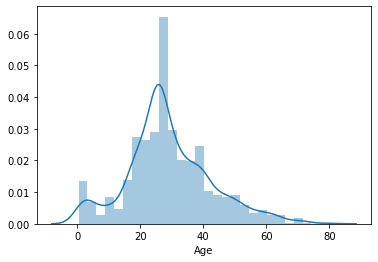

In [43]:
#Check distribution of 'Age'
sns.distplot(train_data['Age'])

## Exploratory Data Analysis

Visualisations to find observable patterns and confirm/reject intuition of the following results. 

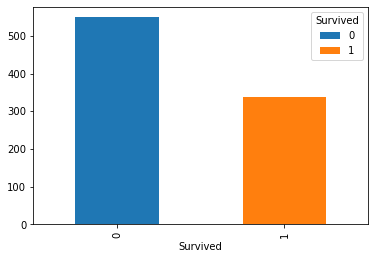

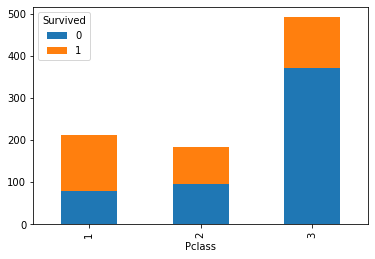

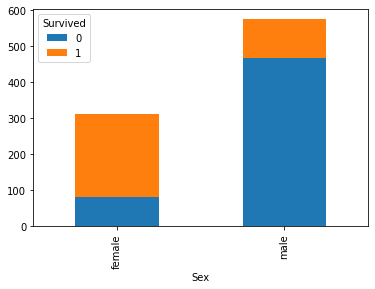

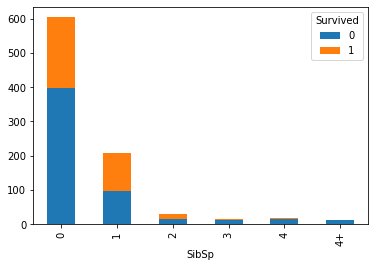

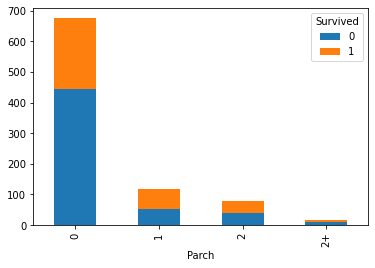

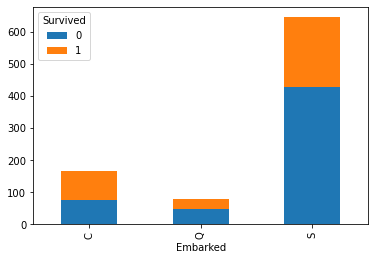

In [44]:
#Stacked bar charts
for i in categorical_cols:
    train_data.groupby([i])['Survived'].value_counts().unstack().sort_index().plot(kind = 'bar',stacked=True)
    plt.savefig('bar_chart_survived'+i)
    plt.show()

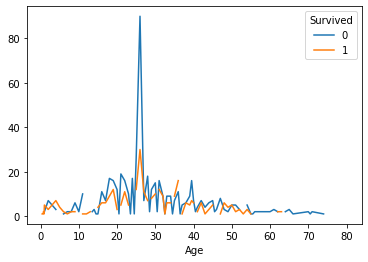

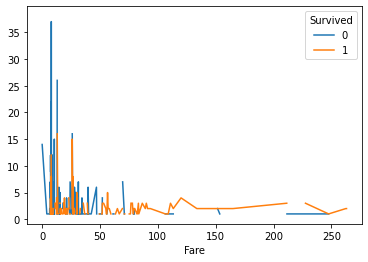

In [45]:
#Line charts 
for i in numerical_cols: 
    train_data.groupby([i])['Survived'].value_counts().unstack().sort_index().plot(kind = 'line')
    plt.savefig('Line_chart_survived'+i)
    plt.show()

**Findings**: 
- Less number of individuals survived than non-survivors
- First Ticket Class holders were more likely to survive 
- Females were more likely to surivive
- Passengers with less than two siblings/spouses aboard were more likely to survive
- Despite most survivors had no parents/children aboard, but in terms of proportion, of other survivors were more likely to survive
- Most survivors embarked from Southampton, but in terms of proportion, passengers who embarked from Cherbourg were more likely to survive 
- Not much to report on survival across age, however higher passenger fares showed more survival rates than lower passenger fares. 

In [46]:
#Check data types in train_data
train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp        object
Parch        object
Fare        float64
Embarked     object
dtype: object

In [47]:
#Convert Pclass to string for One Hot Encoding
train_data['Pclass'] = train_data['Pclass'].astype('str')

In [48]:
#One Hot Encoding
train_data1=pd.get_dummies(train_data)
train_data1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,SibSp_3,SibSp_4,SibSp_4+,Parch_0,Parch_1,Parch_2,Parch_2+,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1


In [49]:
#Drop columns from One Hot Encoding to avoid multicollinearlity
#Note:'k-1' dummies for 'k' categories; a 'k'-th dummy variable is redundant 
#Carries no new information and creates multicollinearlity

train_data1.drop(['Pclass_1','Sex_female','SibSp_0','Parch_0','Embarked_C'],axis=1, inplace=True)

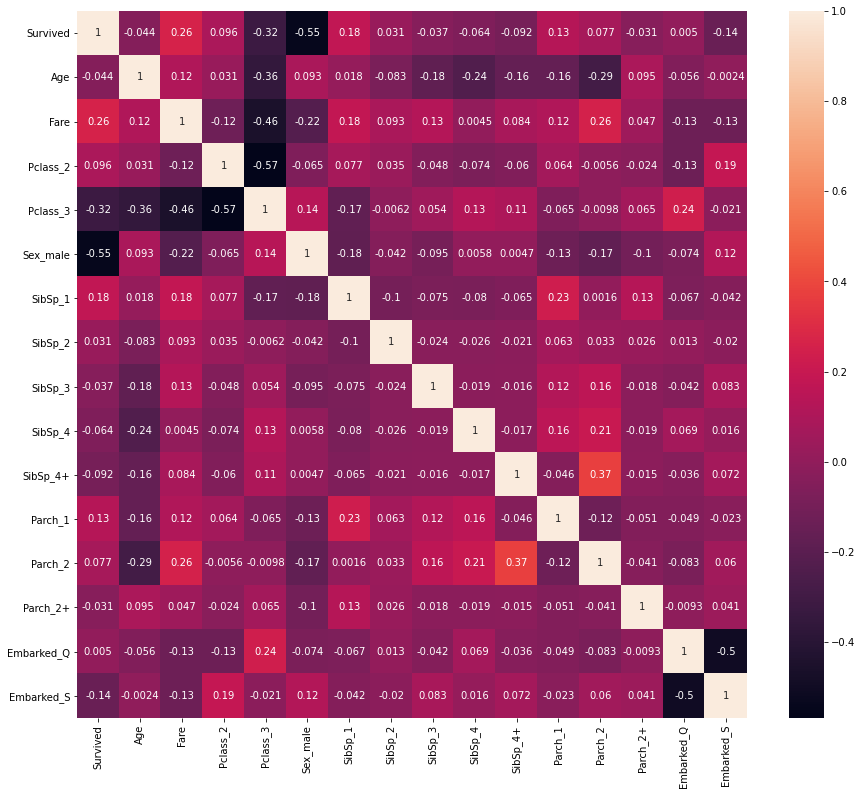

In [50]:
plt.figure(figsize=(15, 13))
sns.heatmap(train_data1.corr(), annot=True)
plt.savefig('corr_heatmap.png')
plt.show()

**Findings**:

Correlations with 'Survived':
- Male passengers (-0.55) and the Third Ticket Class passengers (-0.32) were less likely to have survived.
- Passenger Fares (Fare) were most positively correlated to survival (0.26). 

Correlations of variables unrelated to 'Survived': 
- Age and Parch=2 were negatively correlated.
- Third Ticket Class (Pclass=3) was negatively correlated to Age and Fare also.
- Individuals with 2 parents/children aboard (Parch=2) were positively correlated to Fare and more-than-four siblings/spouses (SibSp = 4+).

## Modelling

Feature engineering was finalised to train vanilla models to set baseline Accuracy scores, which was the evaluation metric here. GridSearchCV was applied here to test and tune hyperparameters for each model in determination of the best model as the one with the highest Accuracy score. The best model was deployed in the next section. 

The following models were built: 
- K-Neighbors Classifier
- Decision Tree Classifier
- Logistic Regression
- Support Vector Classification (SVC)
- Random Forest Classifier
- Gradient Boosting Classifier. 

In [51]:
# Import libraries
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import sklearn.metrics
from sklearn.model_selection import GridSearchCV

#For classification modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
#Standardize Age and Fare into Z-scores to improve modelling results
scaler = StandardScaler()
train_data1[['Age','Fare']] = scaler.fit_transform(train_data1[['Age','Fare']])

In [53]:
#Define feature and target variables
feature_df = train_data1[train_data1.columns[1:]]
target_df = train_data1['Survived']

In [54]:
#Select models
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier(random_state=42)
LR = LogisticRegression(random_state=42)
SVC = SVC(random_state=42)
RFC = RandomForestClassifier(random_state=42)
GBC = GradientBoostingClassifier(random_state=42)

In [55]:
#Setup to capture models and Accuracy scores
models = [KNC, DTC, LR, SVC, RFC, GBC]
accuracy = {}

In [56]:
#Vanilla models
for model in models: 
    train_eval_model(model, feature_df, target_df)

In [57]:
#Show values in a created dataframe
scores = pd.DataFrame([accuracy]).T
scores.columns = ['Accuracy']
model_names = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'LogisticRegression', 'SVC', 
                       'RandomForestClassifier', 'GradientBoostingClassifier']
scores.index = model_names
scores_sorted = scores.sort_values('Accuracy', ascending=False)
scores_sorted

,Accuracy
GradientBoostingClassifier,0.815318
SVC,0.810842
RandomForestClassifier,0.805193
LogisticRegression,0.804050
KNeighborsClassifier,0.784955
DecisionTreeClassifier,0.778157


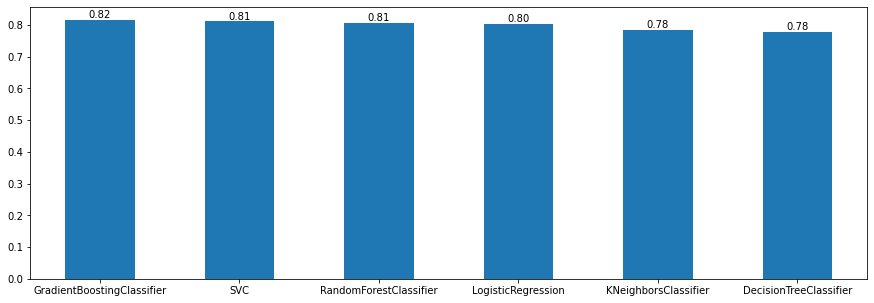

In [58]:
#Plot Accuracy values for each vanilla model
plt.figure(figsize=(15,5))
scores_sorted['Accuracy'].plot(kind='bar')
plt.xticks(rotation=0)

for i in range(len(scores_sorted)):
    plt.text(i,scores_sorted['Accuracy'][i],'%.2f'% scores_sorted['Accuracy'][i],ha='center',va='bottom')

plt.savefig('vanilla_models_accuracy.png', bbox_inches = 'tight')
plt.show()

In [59]:
#Parameters

KNC_parameters = [{'n_neighbors': list(range(1,11))}]

DTC_parameters = [{'max_depth': list(range(1,11))}]

LR_parameters = [{'C':[0.0001, 0.001,0.1,1,10,50,100]}]

SVC_parameters = [{'C':[0.0001, 0.001,0.1,1,10,50,100], 
                   'kernel':['linear','rbf']}]

RFC_parameters = [{'n_estimators': [50, 100, 150, 200],  
                  'max_depth': list(range(1,11))}]

GBC_parameters = [{'n_estimators': [50, 100, 150, 200],
                   'max_depth': list(range(1,11)),
                   'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}]

In [60]:
#Parameter_df
parameters = [KNC_parameters, DTC_parameters, LR_parameters, SVC_parameters, RFC_parameters, GBC_parameters]
parameters = pd.DataFrame(parameters)
parameters.columns = ['parameters']

models = pd.DataFrame(models)
models.columns = ['models']

parameter_df = pd.concat([models, parameters],axis=1)
parameter_df.index = [model_names]
parameter_df

,models,parameters
KNeighborsClassifier,KNeighborsClassifier(),"{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}"
DecisionTreeClassifier,DecisionTreeClassifier(random_state=42),"{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}"
LogisticRegression,LogisticRegression(random_state=42),"{'C': [0.0001, 0.001, 0.1, 1, 10, 50, 100]}"
SVC,SVC(random_state=42),"{'C': [0.0001, 0.001, 0.1, 1, 10, 50, 100], 'k..."
RandomForestClassifier,RandomForestClassifier(random_state=42),"{'n_estimators': [50, 100, 150, 200], 'max_dep..."
GradientBoostingClassifier,GradientBoostingClassifier(random_state=42),"{'n_estimators': [50, 100, 150, 200], 'max_dep..."


In [61]:
#Store best models from each model type
Best_model = {}
Best_model_params = {}
Best_model_score = {}

In [62]:
#model function to GridSearchCV hyperparameters for all models 
for i in range(len(parameter_df)):
    model = parameter_df['models'][i]
    parameters = parameter_df['parameters'][i] 
    best_model(model, parameters, feature_df, target_df)

In [63]:
#Convert dictionaries to DataFrames 
Best_model = pd.DataFrame([Best_model]).T
Best_model_params = pd.DataFrame([Best_model_params]).T
Best_model_score = pd.DataFrame([Best_model_score]).T

In [64]:
Best_models = pd.concat([Best_model_params, Best_model_score],axis=1)
Best_models.columns = ['Best_model_params', 'Best_model_score']
Best_models.index = model_names

In [65]:
#Accuracy scores of the best models after tuning hyperparameters
Best_models_sorted = Best_models.sort_values('Best_model_score',ascending=False)

#See full elements in dataframe
pd.set_option('display.max_colwidth', None)

#Dataframe
Best_models_sorted

,Best_model_params,Best_model_score
GradientBoostingClassifier,"{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 150}",0.832203
RandomForestClassifier,"{'max_depth': 5, 'n_estimators': 200}",0.828820
DecisionTreeClassifier,{'max_depth': 4},0.818701
LogisticRegression,{'C': 100},0.814188
SVC,"{'C': 1, 'kernel': 'rbf'}",0.810842
KNeighborsClassifier,{'n_neighbors': 3},0.790599


**Gradient Boosting Classifier** *(learning_rate = 0.01, max_depth = 6, n_estimators = 150)* had the highest Accuracy score of 0.832 amongst all the best models. This model will be deployed to predict the test data.

### Training best model

In [66]:
#Define model as best model
model = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 6, n_estimators = 150, random_state=0)
model.fit(feature_df,target_df)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=150,
                           random_state=0)

In [67]:
#feature importances
importances = model.feature_importances_

feature_importances = pd.DataFrame({'feature':feature_df.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)

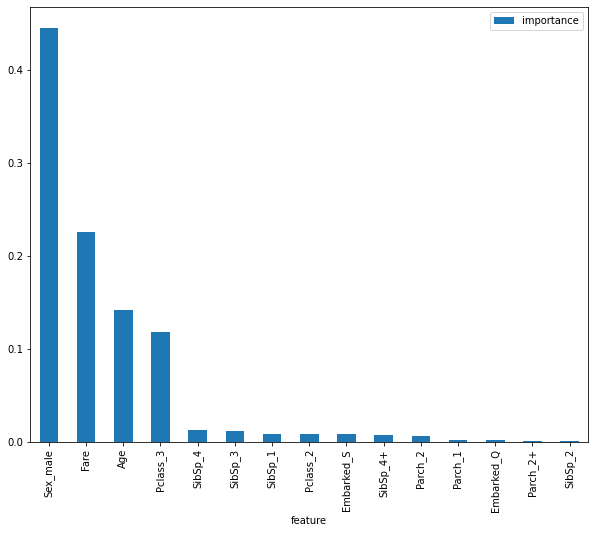

In [68]:
#Plot feature importances
feature_importances.plot.bar(figsize=(10,8))
plt.savefig('feature_importances.png',bbox_inches = 'tight')
plt.show()

The key feature importance variables in relation to survival were: gender (Sex_male), passenger fare (Fare), age (Age) and the Third Ticket Class (Pclass=3).

## Deploying solution

The same process was used on test_data to prepare the data for the survival predictions, which includes:
- Proxies for the missing Fare value (done earlier)
- Applying the proxy for missing Age data 
- Dropping irrelevant variables (done earlier)
- One Hot Encoding for Pclass, SibSp, Parch and Embarked variables
- Standardising Age and Fare data.

After the data preparation, the model was deployed for submission. 

In [69]:
#Quick scan of test_data
quick_scan(test_data)

Shape:


(418, 7)

Data Types:


Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Head:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


Tail:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S
417,3,male,NaN,1,1,22.3583,C


In [70]:
#Replace null Fare with median
#test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

#Check if replacement worked
#test_data['Fare'].isnull().sum()

In [71]:
#Drop irrelevant variables in test_data
#test_data.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [72]:
#Create a 'more than 4' group for SibSp
test_data.loc[test_data['SibSp'] > 4, 'SibSp'] = '4+'

#Convert integer into string 
test_data['SibSp'] = test_data['SibSp'].astype(str)

In [73]:
#Create a 'more than 2' group for Parch
test_data.loc[test_data['Parch'] > 2, 'Parch'] = '2+'

#Convert integer into string 
test_data['Parch'] = test_data['Parch'].astype(str)

In [74]:
#Proxy for missing Age data: median values according to an individual's Pclass, SibSp and Parch
#Median was used due to wide age distributions across each variables' categories
test_data['Age'] = test_data.groupby(['Pclass','SibSp','Parch'])['Age'].transform(lambda x: x.fillna(x.median()))

#Check if there are any more nulls after proxy
test_data['Age'].isnull().sum()

1

In [75]:
#Missing age data - not fitting with proxy procedure
missing_age = test_data[test_data.isna().any(axis=1)]
missing_age

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
132,3,female,NaN,0,2+,25.4667,S


There is one individual that remains without a proxy for age. 
We will use the proxy from train_data to replace this missing age data, as it is the only exception the test_data with Pclass = 3, SibSp=0 and Parch = 2+. 

In [76]:
#Check if values in train_data exist for missing age proxy
missing_age_proxy = train_data.loc[(train_data['Pclass']=='3') & (train_data['SibSp']=='0') & (train_data['Parch']=='2+')]
missing_age_proxy

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
567,0,3,female,29.0,0,2+,21.0750,S
638,0,3,female,41.0,0,2+,39.6875,S
858,1,3,female,24.0,0,2+,19.2583,C
885,0,3,female,39.0,0,2+,29.1250,Q


In [77]:
#Proxy for missing age individual in test_data
missing_age_proxy = np.median(missing_age_proxy['Age'])

In [78]:
#Proxy remaining missing age
test_data['Age'].fillna(missing_age_proxy, inplace=True)

In [79]:
#Check if proxy replaced missing age data
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [80]:
#Convert Pclass to string for One Hot Encoding
test_data['Pclass'] = test_data['Pclass'].astype('str')

In [81]:
#One Hot Encoding
test_data1=pd.get_dummies(test_data)
test_data1.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_4+,Parch_0,Parch_1,Parch_2,Parch_2+,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
1,47.0,7.0000,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,62.0,9.6875,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
3,27.0,8.6625,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
4,22.0,12.2875,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [82]:
#Drop columns from One Hot Encoding to avoid multicollinearlity
#Note:'k-1' dummies for 'k' categories; a 'k'-th dummy variable is redundant 
#Carries no new information and creates multicollinearlity

test_data1.drop(['Pclass_1','Sex_female','SibSp_0','Parch_0','Embarked_C'],axis=1, inplace=True)

In [83]:
test_data1.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_4+,Parch_1,Parch_2,Parch_2+,Embarked_Q,Embarked_S
0,34.5,7.8292,0,1,1,0,0,0,0,0,0,0,0,1,0
1,47.0,7.0000,0,1,0,1,0,0,0,0,0,0,0,0,1
2,62.0,9.6875,1,0,1,0,0,0,0,0,0,0,0,1,0
3,27.0,8.6625,0,1,1,0,0,0,0,0,0,0,0,0,1
4,22.0,12.2875,0,1,0,1,0,0,0,0,1,0,0,0,1


In [84]:
#Standardise Age and Fare into Z-scores to improve modelling results
scaler = StandardScaler()
test_data1[['Age','Fare']] = scaler.fit_transform(test_data1[['Age','Fare']])

In [85]:
#Preview dataframe after standardising Age and Fare
test_data1.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_4+,Parch_1,Parch_2,Parch_2+,Embarked_Q,Embarked_S
0,0.395645,-0.497413,0,1,1,0,0,0,0,0,0,0,0,1,0
1,1.352225,-0.512278,0,1,0,1,0,0,0,0,0,0,0,0,1
2,2.500120,-0.464100,1,0,1,0,0,0,0,0,0,0,0,1,0
3,-0.178303,-0.482475,0,1,1,0,0,0,0,0,0,0,0,0,1
4,-0.560935,-0.417492,0,1,0,1,0,0,0,0,1,0,0,0,1


In [86]:
#Model to be deployed
print(model)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=150,
                           random_state=0)


In [87]:
#Salary predictions on test set
survival_predictions = model.predict(test_data1)

In [88]:
#Preview of survival_predictions
survival_predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Submission: 

File is to have exactly 2 columns: 
- PassengerId (sorted in any order)
- Survived (contains your binary predictions: 1 for survived, 0 for deceased)

In [89]:
#Re-load test_data
test_data = load_file("test.csv")

In [91]:
#From test_data, extract and concat PassengerId with survival_predictions
submission = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived': survival_predictions})

In [92]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [93]:
#Submission.csv
submission.to_csv('submission.csv',index=False)

## Appendix

Tables for README.md

In [94]:
#Preview of train_data
original_train_data = load_file("train.csv")
print(original_train_data.head().to_markdown())

|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |
|---:|--------------:|-----------:|---------:|:----------------------------------------------------|:-------|------:|--------:|--------:|:-----------------|--------:|:--------|:-----------|
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |
|  1 |             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female |    38 |       1 |       0 | PC 17599         | 71.2833 | C85     | C          |
|  2 |             3 |          1 |        3 | Heikkinen, Miss. Laina                              | female |    26 |       0 |       0 | STON/O2. 3101282 |  7.925  | nan     | S          |
|  3 |             4 |          1 |        1 | Fut

In [95]:
#Descriptive statistics, 'object' variables from train_data
print(original_train_data.describe(include='object').to_markdown())

|        | Name                                           | Sex   |   Ticket | Cabin   | Embarked   |
|:-------|:-----------------------------------------------|:------|---------:|:--------|:-----------|
| count  | 891                                            | 891   |      891 | 204     | 889        |
| unique | 891                                            | 2     |      681 | 147     | 3          |
| top    | Rothschild, Mrs. Martin (Elizabeth L. Barrett) | male  |   347082 | B96 B98 | S          |
| freq   | 1                                              | 577   |        7 | 4       | 644        |


In [96]:
#Descriptive statistics, 'integer' variables from train_data
print(original_train_data.describe(include='int64').to_markdown())

|       |   PassengerId |   Survived |     Pclass |      SibSp |      Parch |
|:------|--------------:|-----------:|-----------:|-----------:|-----------:|
| count |       891     | 891        | 891        | 891        | 891        |
| mean  |       446     |   0.383838 |   2.30864  |   0.523008 |   0.381594 |
| std   |       257.354 |   0.486592 |   0.836071 |   1.10274  |   0.806057 |
| min   |         1     |   0        |   1        |   0        |   0        |
| 25%   |       223.5   |   0        |   2        |   0        |   0        |
| 50%   |       446     |   0        |   3        |   0        |   0        |
| 75%   |       668.5   |   1        |   3        |   1        |   0        |
| max   |       891     |   1        |   3        |   8        |   6        |


In [97]:
#Descriptive statistics, 'float' variables from train_data
print(original_train_data.describe(include='float64').to_markdown())

|       |      Age |     Fare |
|:------|---------:|---------:|
| count | 714      | 891      |
| mean  |  29.6991 |  32.2042 |
| std   |  14.5265 |  49.6934 |
| min   |   0.42   |   0      |
| 25%   |  20.125  |   7.9104 |
| 50%   |  28      |  14.4542 |
| 75%   |  38      |  31      |
| max   |  80      | 512.329  |


In [98]:
#Preview of feature dataset used after: 
#- Dropping irrelevant columns: PassengerId, Name, Ticket and Cabin
#- Standardised Age and Fare
#- Dummy variables for Pclass, Sex, SibSp, Parch and Embarked 
print(feature_df.head().to_markdown())

|    |       Age |      Fare |   Pclass_2 |   Pclass_3 |   Sex_male |   SibSp_1 |   SibSp_2 |   SibSp_3 |   SibSp_4 |   SibSp_4+ |   Parch_1 |   Parch_2 |   Parch_2+ |   Embarked_Q |   Embarked_S |
|---:|----------:|----------:|-----------:|-----------:|-----------:|----------:|----------:|----------:|----------:|-----------:|----------:|----------:|-----------:|-------------:|-------------:|
|  0 | -0.530772 | -0.566959 |          0 |          1 |          1 |         1 |         0 |         0 |         0 |          0 |         0 |         0 |          0 |            0 |            1 |
|  1 |  0.658943 |  0.989016 |          0 |          0 |          0 |         1 |         0 |         0 |         0 |          0 |         0 |         0 |          0 |            0 |            0 |
|  2 | -0.233343 | -0.550557 |          0 |          1 |          0 |         0 |         0 |         0 |         0 |          0 |         0 |         0 |          0 |            0 |            1 |
|  3 |  0.

In [99]:
#Vanilla model scores
print(scores_sorted.to_markdown())

|                            |   Accuracy |
|:---------------------------|-----------:|
| GradientBoostingClassifier |   0.815318 |
| SVC                        |   0.810842 |
| RandomForestClassifier     |   0.805193 |
| LogisticRegression         |   0.80405  |
| KNeighborsClassifier       |   0.784955 |
| DecisionTreeClassifier     |   0.778157 |


In [100]:
#Tuning hyperparameters
print(parameter_df.to_markdown())

|                                 | models                                      | parameters                                                                                                                                   |
|:--------------------------------|:--------------------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------|
| ('KNeighborsClassifier',)       | KNeighborsClassifier()                      | {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}                                                                                             |
| ('DecisionTreeClassifier',)     | DecisionTreeClassifier(random_state=42)     | {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}                                                                                               |
| ('LogisticRegression',)         | LogisticRegression(random_state=42)         | {'C': [0.0001, 0.0

In [101]:
#Accuracy scores from the best models from each model type
print(Best_models_sorted.to_markdown())

|                            | Best_model_params                                            |   Best_model_score |
|:---------------------------|:-------------------------------------------------------------|-------------------:|
| GradientBoostingClassifier | {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 150} |           0.832203 |
| RandomForestClassifier     | {'max_depth': 5, 'n_estimators': 200}                        |           0.82882  |
| DecisionTreeClassifier     | {'max_depth': 4}                                             |           0.818701 |
| LogisticRegression         | {'C': 100}                                                   |           0.814188 |
| SVC                        | {'C': 1, 'kernel': 'rbf'}                                    |           0.810842 |
| KNeighborsClassifier       | {'n_neighbors': 3}                                           |           0.790599 |
